In [2]:
# Ethereum prediction program with python.

In [3]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
#Eth Data
from google.colab import files
files.upload()

Saving ETH-USD.csv to ETH-USD.csv


{'ETH-USD.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2022-10-10,1322.618652,1335.662720,1291.337646,1291.337646,1291.337646,8794491050\n2022-10-11,1291.109619,1296.273926,1272.737671,1279.575684,1279.575684,9274845260\n2022-10-12,1279.732300,1303.075195,1277.527466,1294.906372,1294.906372,8355638578\n2022-10-13,1294.917358,1297.564209,1209.278198,1288.123901,1288.123901,17499038202\n2022-10-14,1288.048706,1339.744751,1285.378296,1297.422119,1297.422119,13113767755\n2022-10-15,1297.305908,1300.745972,1268.468506,1274.871704,1274.871704,6798512624\n2022-10-16,1275.005493,1312.634521,1275.005493,1306.296631,1306.296631,7491625206\n2022-10-17,1306.309570,1335.647827,1297.447266,1331.713623,1331.713623,9401189650\n2022-10-18,1331.669922,1339.085938,1291.660645,1310.447021,1310.447021,10416747806\n2022-10-19,1310.563110,1312.442383,1283.965332,1285.744263,1285.744263,8350692785\n2022-10-20,1285.660278,1307.855103,1275.323975,1283.200928,1283.200928,9009111996\n2022-10-21,1283.188110,

In [5]:
# Now read the Data
df = pd.read_csv('ETH-USD.csv')

In [6]:
# Set date as the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
# Showing DF
df

,Date,Open,High,Low,Close,Adj Close,Volume
2022-10-10,2022-10-10,1322.618652,1335.662720,1291.337646,1291.337646,1291.337646,8794491050
2022-10-11,2022-10-11,1291.109619,1296.273926,1272.737671,1279.575684,1279.575684,9274845260
2022-10-12,2022-10-12,1279.732300,1303.075195,1277.527466,1294.906372,1294.906372,8355638578
2022-10-13,2022-10-13,1294.917358,1297.564209,1209.278198,1288.123901,1288.123901,17499038202
2022-10-14,2022-10-14,1288.048706,1339.744751,1285.378296,1297.422119,1297.422119,13113767755
...,...,...,...,...,...,...,...
2023-10-06,2023-10-06,1611.365723,1659.609863,1611.365723,1645.831543,1645.831543,4941208729
2023-10-07,2023-10-07,1645.810913,1648.183716,1631.158203,1634.511230,1634.511230,2578994988
2023-10-08,2023-10-08,1634.657349,1641.182373,1618.189209,1633.548584,1633.548584,3315554175
2023-10-09,2023-10-09,1633.454834,1635.447876,1553.006958,1579.806641,1579.806641,7020801716


In [7]:
future_days = 10

In [8]:
# Another column
df[str(future_days)+'_Day_Price_Forecast']= df[['Close']].shift(-future_days)
# Showing data
df[['Close', str(future_days)+'_Day_Price_Forecast']]

,Close,10_Day_Price_Forecast
2022-10-10,1291.337646,1283.200928
2022-10-11,1279.575684,1299.946411
2022-10-12,1294.906372,1314.299194
2022-10-13,1288.123901,1363.447021
2022-10-14,1297.422119,1344.998535
...,...,...
2023-10-06,1645.831543,NaN
2023-10-07,1634.511230,NaN
2023-10-08,1633.548584,NaN
2023-10-09,1579.806641,NaN


In [9]:
X = np.array(df[['Close']])
X = X[:df.shape[0] - future_days]
print(X)

[[1291.337646]
 [1279.575684]
 [1294.906372]
 [1288.123901]
 [1297.422119]
 [1274.871704]
 [1306.296631]
 [1331.713623]
 [1310.447021]
 [1285.744263]
 [1283.200928]
 [1299.946411]
 [1314.299194]
 [1363.447021]
 [1344.998535]
 [1461.665405]
 [1566.56665 ]
 [1514.374878]
 [1555.477905]
 [1619.698486]
 [1590.783325]
 [1572.714478]
 [1579.70459 ]
 [1519.711792]
 [1531.541748]
 [1645.093384]
 [1627.968018]
 [1572.234741]
 [1568.591309]
 [1332.835571]
 [1100.1698  ]
 [1299.4646  ]
 [1287.221069]
 [1255.268311]
 [1221.819214]
 [1241.604248]
 [1251.736206]
 [1215.602539]
 [1200.808594]
 [1212.300293]
 [1218.426758]
 [1142.466675]
 [1108.353027]
 [1135.173462]
 [1183.199585]
 [1203.983154]
 [1198.925903]
 [1205.897949]
 [1195.126953]
 [1170.086182]
 [1216.901245]
 [1295.688599]
 [1276.273926]
 [1294.303345]
 [1243.334839]
 [1280.256592]
 [1259.676758]
 [1271.653809]
 [1232.4375  ]
 [1281.116333]
 [1264.28479 ]
 [1266.384155]
 [1263.86853 ]
 [1274.619019]
 [1320.549194]
 [1309.328735]
 [1266.353

In [10]:
y = np.array(df[str(future_days)+'_Day_Price_Forecast'])
y = y[:-future_days]
print(y)

[1283.200928 1299.946411 1314.299194 1363.447021 1344.998535 1461.665405
 1566.56665  1514.374878 1555.477905 1619.698486 1590.783325 1572.714478
 1579.70459  1519.711792 1531.541748 1645.093384 1627.968018 1572.234741
 1568.591309 1332.835571 1100.1698   1299.4646   1287.221069 1255.268311
 1221.819214 1241.604248 1251.736206 1215.602539 1200.808594 1212.300293
 1218.426758 1142.466675 1108.353027 1135.173462 1183.199585 1203.983154
 1198.925903 1205.897949 1195.126953 1170.086182 1216.901245 1295.688599
 1276.273926 1294.303345 1243.334839 1280.256592 1259.676758 1271.653809
 1232.4375   1281.116333 1264.28479  1266.384155 1263.86853  1274.619019
 1320.549194 1309.328735 1266.353882 1168.259399 1188.149536 1184.71521
 1167.609863 1217.703613 1213.599976 1218.182129 1220.159424 1221.14856
 1218.962036 1226.974365 1212.791626 1189.986084 1201.595337 1199.232788
 1196.77124  1200.964844 1214.656616 1214.778809 1256.526611 1250.438599
 1269.379028 1264.270386 1287.359497 1321.53894  1336

In [11]:
#Spliting data.model_Sectionjdndkfsdkfdfjsfsjdnfnsdfnjsk
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

_

In [12]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=1e-05)

In [13]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr_rbf accuracy:', svr_rbf_confidence)

svr_rbf accuracy: 0.7635123983159791


In [14]:
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)

[1360.321732   1432.26466527 1210.32456633 1820.26589652 1657.32247903
 1861.35322436 1800.84219412 1871.75290644 1225.62757284 1203.325372
 1298.64347927 1871.19360564 1296.33272018 1627.14994209 1211.53265232
 1849.83397089 1870.00372411 1239.69888695 1626.21067171 1258.24147155
 1837.21433033 1378.15553259 1741.53986108 1820.99466482 1853.12697358
 1272.60450367 1381.90203959 1626.26117715 1861.6786054  1626.69996058
 1829.4836642  1654.26183011 1733.88171016 1828.26490736 1752.36343118
 1673.18696553 1855.00093542 1863.34456873 1838.22022649 1857.72183671
 1636.18584243 1629.82999968 1637.3179245  1627.76233653 1642.49643803
 1733.95381983 1651.46870405 1561.96786423 1317.38900308 1334.33471547
 1312.50233194 1201.83071892 1645.22142473 1627.12772799 1862.61195894
 1843.37928293 1833.81989469 1639.93055495 1848.18204314 1655.90786103
 1667.8435843  1651.60976683 1857.0415227  1289.95403279 1434.41107671
 1636.60198318 1234.46847039 1628.59405727 1313.27845076 1691.94292555
 1860.61

In [15]:
print(y_test)

[1515.506958 1220.159424 1212.791626 1665.519775 1645.63916  2101.635498
 1849.498169 1880.556396 1276.273926 1295.688599 1550.706909 1876.924316
 1135.173462 1215.602539 1264.270386 1633.892578 2006.511475 1256.526611
 1514.869141 1188.149536 1884.494873 1266.384155 1871.005127 1893.078125
 1907.256592 1203.983154 1344.998535 1593.268311 1847.12439  1603.105957
 1831.118286 1482.616699 1852.227295 1901.026611 1792.119995 1705.112183
 1827.712891 1936.633545 1727.204102 1889.007935 1438.660767 1622.890625
 1702.675171 1546.438232 1633.629395 1813.860596 1567.326538 1627.118164
 1217.703613 1461.665405 1213.599976 1226.974365 1691.819458 1672.00354
 1752.384766 1679.274414 1684.933472 1539.926758 1720.577515 1900.506104
 1637.025391 1636.117676 1854.297607 1198.925903 1552.556519 1593.417236
 1417.938477 1667.059204 1567.846069 1647.319336 1908.786377 1920.682129]


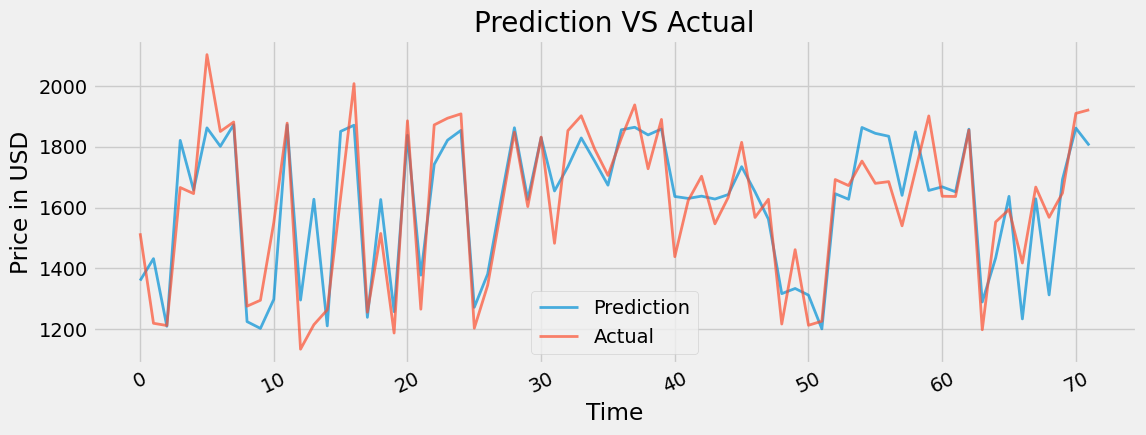

In [17]:
plt.figure(figsize=(12,4))
plt.plot(svm_prediction, label='Prediction', lw=2, alpha=.7)
plt.plot(y_test, label='Actual', lw=2, alpha=.7)
plt.title('Prediction VS Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=25)
plt.show()